In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array


In [3]:
! git clone https://github.com/laxmimerit/male-female-face-dataset.git

Cloning into 'male-female-face-dataset'...
remote: Enumerating objects: 58657, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 58657 (delta 0), reused 0 (delta 0), pack-reused 58656
Receiving objects: 100% (58657/58657), 261.44 MiB | 29.21 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (58659/58659), done.


#**Generating the Image**

---



In [4]:
train_data_gen = ImageDataGenerator(horizontal_flip=True,
                                    width_shift_range = 0.5,
                                    height_shift_range = 0.5,
                                    zoom_range = 0.4,
                                    rotation_range = 200,
                                    rescale = 1/255
                                    )

In [5]:
test_gen = ImageDataGenerator(rescale = 1/255)

In [6]:
size = 224
target_size = (size,size)
target_size

(224, 224)

In [22]:
batch_size = 500
epochs = 50
data = []
labels = []

In [8]:
train_generator = train_data_gen.flow_from_directory(
    directory = '/content/male-female-face-dataset/Training',
    target_size = target_size,
    batch_size = batch_size,
    class_mode ='binary',

)

Found 47009 images belonging to 2 classes.


In [9]:
validation_generator = test_gen.flow_from_directory(
    directory = '/content/male-female-face-dataset/Validation',
    target_size = target_size,
    batch_size = batch_size,
    class_mode ='binary',
)

Found 11649 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'female': 0, 'male': 1}

In [11]:
train_generator.index_array

In [12]:
x,y = train_generator.next()

In [13]:
x[0]

array([[[0.3171738 , 0.24300188, 0.27592963],
        [0.31764707, 0.2392157 , 0.27450982],
        [0.31764707, 0.24294452, 0.27699572],
        ...,
        [0.1254902 , 0.10588236, 0.09019608],
        [0.1254902 , 0.10588236, 0.09019608],
        [0.12411254, 0.10519353, 0.09019608]],

       [[0.31722152, 0.24261996, 0.2757864 ],
        [0.31764707, 0.2392157 , 0.27450982],
        [0.31764707, 0.24308775, 0.27709118],
        ...,
        [0.1254902 , 0.10588236, 0.09019608],
        [0.1254902 , 0.10588236, 0.09019608],
        [0.12401706, 0.10514579, 0.09019608]],

       [[0.3172693 , 0.24223803, 0.2756432 ],
        [0.31764707, 0.2392157 , 0.27450982],
        [0.31764707, 0.24323098, 0.27718666],
        ...,
        [0.1254902 , 0.10588236, 0.09019608],
        [0.1254902 , 0.10588236, 0.09019608],
        [0.12392158, 0.10509804, 0.09019608]],

       ...,

       [[0.76470596, 0.5529412 , 0.45098042],
        [0.76470596, 0.5529412 , 0.45098042],
        [0.7645617 , 0

#Model Building 

In [14]:
model = Sequential()
model.add(InceptionV3(include_top=False,pooling='avg',weights = 'imagenet'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2028,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))
model.layers[0].trainable = False

87924736/87910968 [==============================] - 1s 0us/step


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 2028)              4155372   
_________________________________________________________________
batch_normalization_95 (Batc (None, 2028)              8112      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2077696   
_________________________________________________________________
batch_normalization_96 (Batc (None, 1024)              4

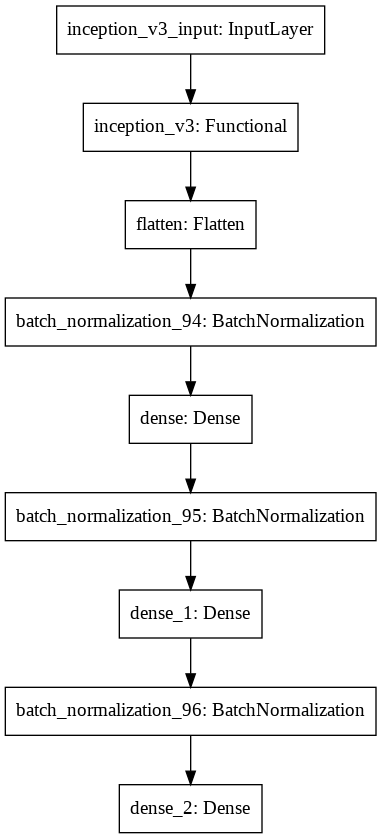

In [16]:
keras.utils.plot_model(model)

In [17]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
len((train_generator.filenames))

47009

In [23]:
len(train_generator.filenames),batch_size,len(train_generator.filenames)//batch_size,epochs

(47009, 500, 94, 50)

In [25]:
model.fit(train_generator,steps_per_epoch=len(train_generator.filenames)//batch_size,epochs = 2,
          validation_data=validation_generator,validation_steps=len(validation_generator.filenames)//batch_size)

Epoch 1/2
94/94 [==============================] - 160s 2s/step - loss: 0.4100 - accuracy: 0.8108 - val_loss: 0.2946 - val_accuracy: 0.8757
Epoch 2/2
94/94 [==============================] - 163s 2s/step - loss: 0.4126 - accuracy: 0.8118 - val_loss: 0.2577 - val_accuracy: 0.9008


In [26]:
img_path = '/content/3661.jpg'

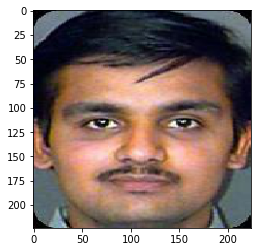

In [28]:
img = load_img(img_path,target_size = (size,size,3))
plt.imshow(img)

In [29]:
img = img_to_array(img)

In [30]:
img

array([[[ 5.,  0.,  1.],
        [ 5.,  0.,  1.],
        [12.,  6., 10.],
        ...,
        [ 0.,  1.,  3.],
        [ 0.,  0.,  2.],
        [ 0.,  0.,  2.]],

       [[ 4.,  0.,  2.],
        [ 4.,  0.,  2.],
        [ 4.,  0.,  2.],
        ...,
        [ 4.,  5.,  7.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.]],

       [[ 9.,  3.,  7.],
        [ 9.,  3.,  7.],
        [ 4.,  0.,  2.],
        ...,
        [ 1.,  2.,  4.],
        [ 2.,  4.,  3.],
        [ 2.,  4.,  3.]],

       ...,

       [[ 7.,  0.,  2.],
        [ 7.,  0.,  2.],
        [14.,  5., 10.],
        ...,
        [ 0.,  0.,  4.],
        [ 1.,  0.,  4.],
        [ 1.,  0.,  4.]],

       [[23., 10., 17.],
        [23., 10., 17.],
        [ 7.,  0.,  0.],
        ...,
        [ 0.,  0.,  4.],
        [ 1.,  0.,  5.],
        [ 1.,  0.,  5.]],

       [[ 8.,  0.,  2.],
        [ 8.,  0.,  2.],
        [18.,  7., 11.],
        ...,
        [ 3.,  2.,  8.],
        [ 3.,  0.,  7.],
        [ 3.,  0.,  7.]]

In [31]:
img = img/255.0

In [32]:
img = img.reshape(1,size,size,3)

In [33]:
model.predict(img)

array([[0.9082272]], dtype=float32)

In [37]:
def get_classes(data):
  prob = model.predict(data)[0][0]

  if prob<=0.5:
    return 'Female', 1-prob[0][0]
  else :
    return 'Male', prob

In [38]:
get_classes(img)

('Male', 0.9082272)